In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [12]:

# Directories
train_dir = "E:\CAPSTONE\Bird_Species_Classification\DataSet_V1_8020/train"
val_dir = "E:\CAPSTONE\Bird_Species_Classification\DataSet_V1_8020/val"
test_dir = "E:\CAPSTONE\Bird_Species_Classification\DataSet_V1_8020/test"


In [13]:


# 1. Load Dataset
print("Loading datasets...")
train_ds = image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32
)

val_ds = image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=32
)

test_ds = image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32
)


Loading datasets...
Found 4434 files belonging to 14 classes.
Found 1115 files belonging to 14 classes.
Found 1393 files belonging to 14 classes.


In [14]:

# Extract class names before applying prefetching
class_names = train_ds.class_names
print(f"Class names: {class_names}")

# Apply prefetching for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


# Model setup
base_model = tf.keras.applications.EfficientNetB7(include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Add the head of the model
model = models.Sequential([
    data_augmentation,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')  # Use extracted class names
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Train the Model
print("Training model...")
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10  # You can adjust this
)

Class names: ['Ashy crowned sparrow lark', 'Asian Openbill', 'Black-headed ibis', 'Crow', 'Eurasian Coot', 'Indian Roller', 'Large-billed Crow', 'Little Cormorant', 'Paddyfield pipit', 'Painted Stork', 'Red-wattled lapwing', 'Spot-billed Pelician', 'White-breasted Waterhen', 'Yellow wattled lapwing']
Training model...
Epoch 1/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 911s 6s/step - accuracy: 0.7017 - loss: 0.9836 - val_accuracy: 0.9426 - val_loss: 0.1753
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 806s 6s/step - accuracy: 0.9169 - loss: 0.2425 - val_accuracy: 0.9641 - val_loss: 0.1140
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 789s 6s/step - accuracy: 0.9486 - loss: 0.1570 - val_accuracy: 0.9713 - val_loss: 0.0996
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1006s 7s/step - accuracy: 0.9629 - loss: 0.1134 - val_accuracy: 0.9740 - val_loss: 0.0841
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1422s 10s/step - accuracy: 0.9630 - loss: 0.1044 - val_accuracy: 0.9776 - val_loss: 0.0743
Epoch 6/10
139/139 ━━━━━━━━━━━━━

In [16]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {test_accuracy:.2f}")


44/44 ━━━━━━━━━━━━━━━━━━━━ 287s 6s/step - accuracy: 0.9797 - loss: 0.0682
Test accuracy: 0.98


In [17]:
model.save("TEST2_B9_Model_V1_8020.h5")

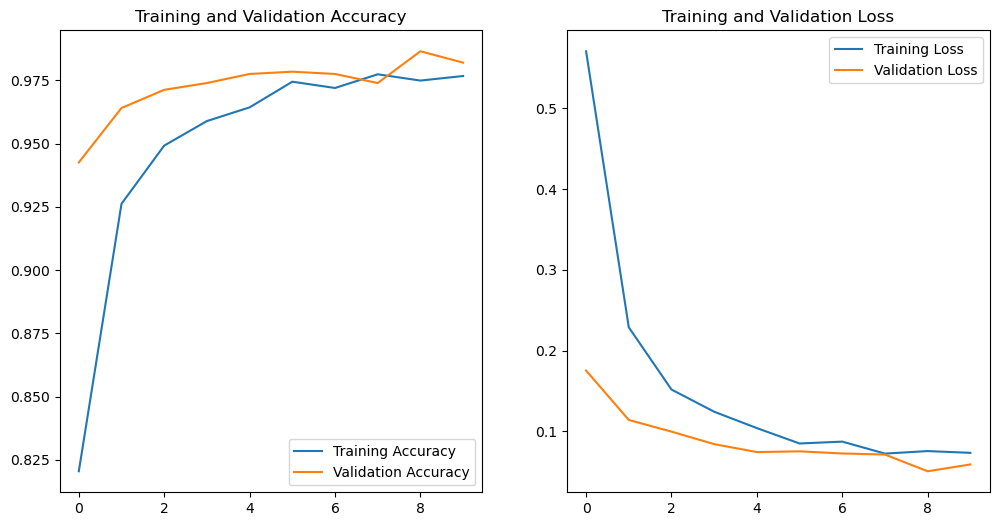

In [18]:

# 7. Plot Training History
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Plot the training history
plot_history(history)


Found 1393 images belonging to 14 classes.


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 818s 17s/step


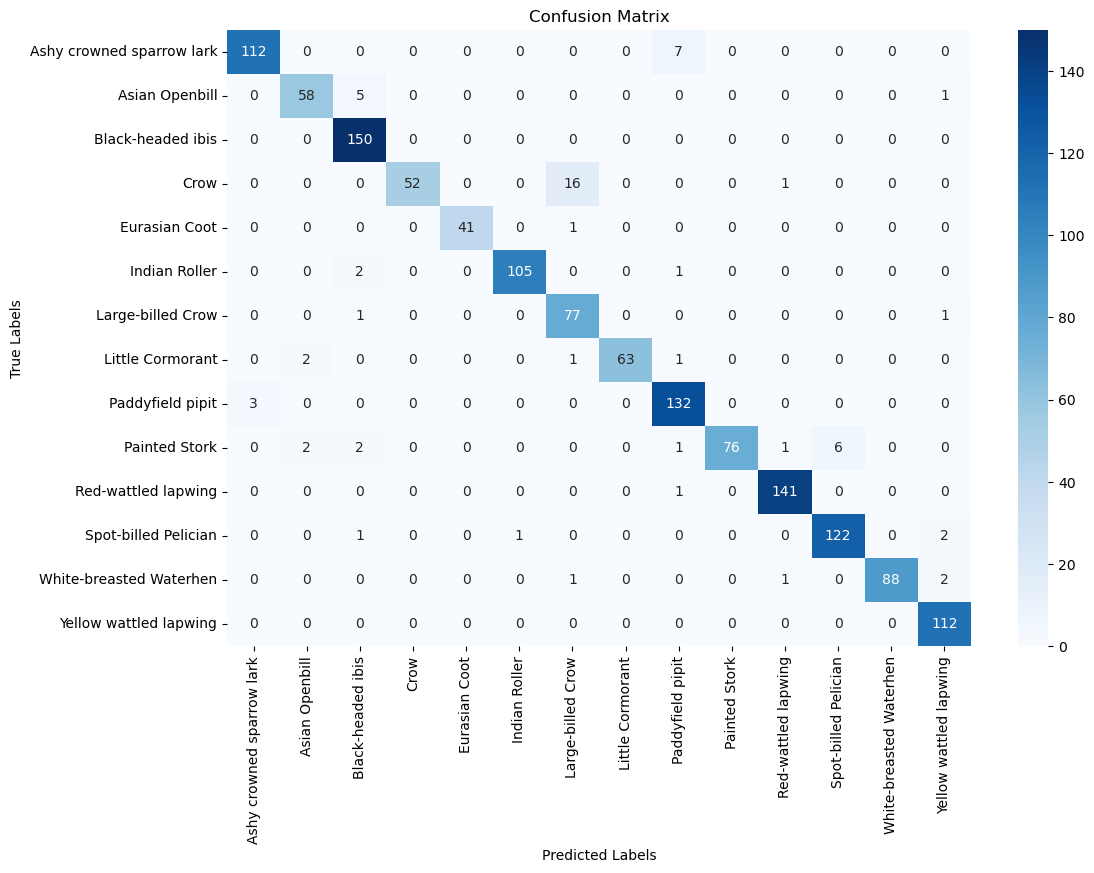

Classification Report:
                            precision    recall  f1-score   support

Ashy crowned sparrow lark       0.97      0.94      0.96       119
           Asian Openbill       0.94      0.91      0.92        64
        Black-headed ibis       0.93      1.00      0.96       150
                     Crow       1.00      0.75      0.86        69
            Eurasian Coot       1.00      0.98      0.99        42
            Indian Roller       0.99      0.97      0.98       108
        Large-billed Crow       0.80      0.97      0.88        79
         Little Cormorant       1.00      0.94      0.97        67
         Paddyfield pipit       0.92      0.98      0.95       135
            Painted Stork       1.00      0.86      0.93        88
      Red-wattled lapwing       0.98      0.99      0.99       142
     Spot-billed Pelician       0.95      0.97      0.96       126
  White-breasted Waterhen       1.00      0.96      0.98        92
   Yellow wattled lapwing       0.95 

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the model
model = load_model('TEST2_B9_Model_V1_8020.h5')

# Path to test data
test_dir = r'E:\CAPSTONE\Bird_Species_Classification\DataSet_V1_8020\test'

# Image data generator for preprocessing
test_datagen = ImageDataGenerator()

# Load test data
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),  # Adjust size as per your model's input
    batch_size=32,
    class_mode='categorical',  # Use 'binary' if you have two classes
    shuffle=False  # Do not shuffle to match predictions with true labels
)

# Get class indices
class_indices = test_data.class_indices
class_labels = list(class_indices.keys())

# Predict on test data
predictions = model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)
y_true = test_data.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n", report)
